In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(10,5)})

In [2]:
# packages arviz, pymc

import pymc as pm
import arviz as az

**Simple Normal Randome Variable**
<br>
<br>$RV \sim N(mu, sigma)$



Only 100 samples in chain.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [RV]


Sampling 2 chains for 1_000 tune and 100 draw iterations (2_000 + 200 draws total) took 30 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


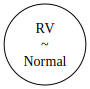

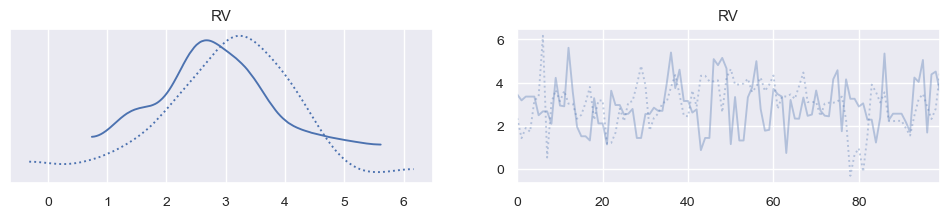

In [3]:
with pm.Model() as model: 
    rv = pm.Normal('RV', mu=3, sigma=1) 
    trace = pm.sample(100, cores=2) 
    pm.plot_trace(trace) 

pm.model_to_graphviz(model)

In [4]:
# hdi: highest density interval (that specific random variable, where most data exists)
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
RV,2.972,1.09,1.136,5.147,0.111,0.078,96.0,108.0,1.0


<Axes: title={'center': 'RV'}>

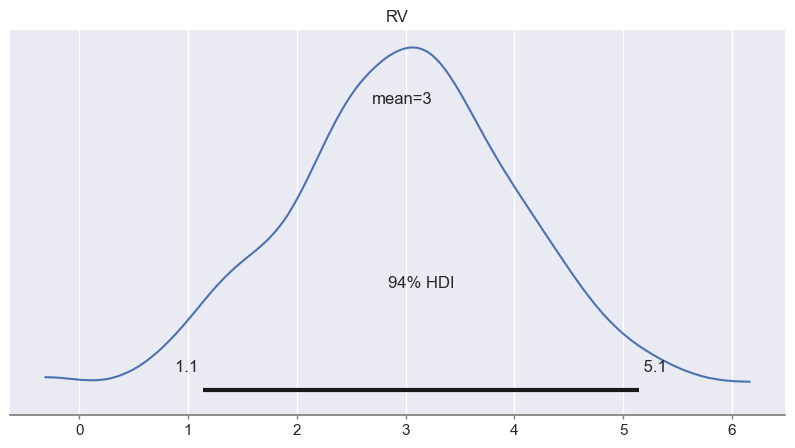

In [5]:
az.plot_posterior(trace)

**Two Random Variables**
<br>
<br> $RV1_{1} \sim N(mu_{1}, sigma_{1})$
<br> $RV1_{2} \sim N(mu_{2}, sigma_{2})$

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [RV1, RV2]


Sampling 2 chains for 1_000 tune and 100 draw iterations (2_000 + 200 draws total) took 19 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
RV1,3.033,1.099,0.752,4.781,0.078,0.060,207.0,131.0,1.00
RV2,5.088,4.437,-2.037,13.375,0.295,0.215,233.0,129.0,1.01


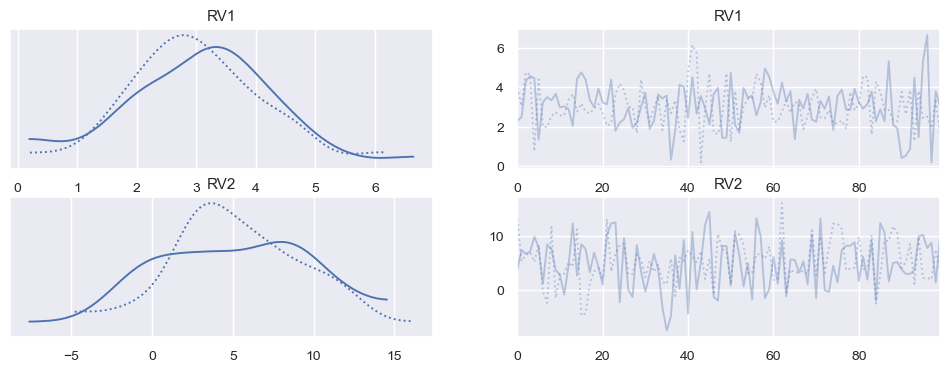

In [6]:
with pm.Model() as model: 
    rv2 = pm.Normal('RV1', mu=3, sigma=1) 
    rv1 = pm.Normal('RV2', mu=5, sigma=4)

    trace = pm.sample(100, cores=2) 
    pm.plot_trace(trace) 

pm.summary(trace)

array([<Axes: title={'center': 'RV1'}>, <Axes: title={'center': 'RV2'}>],
      dtype=object)

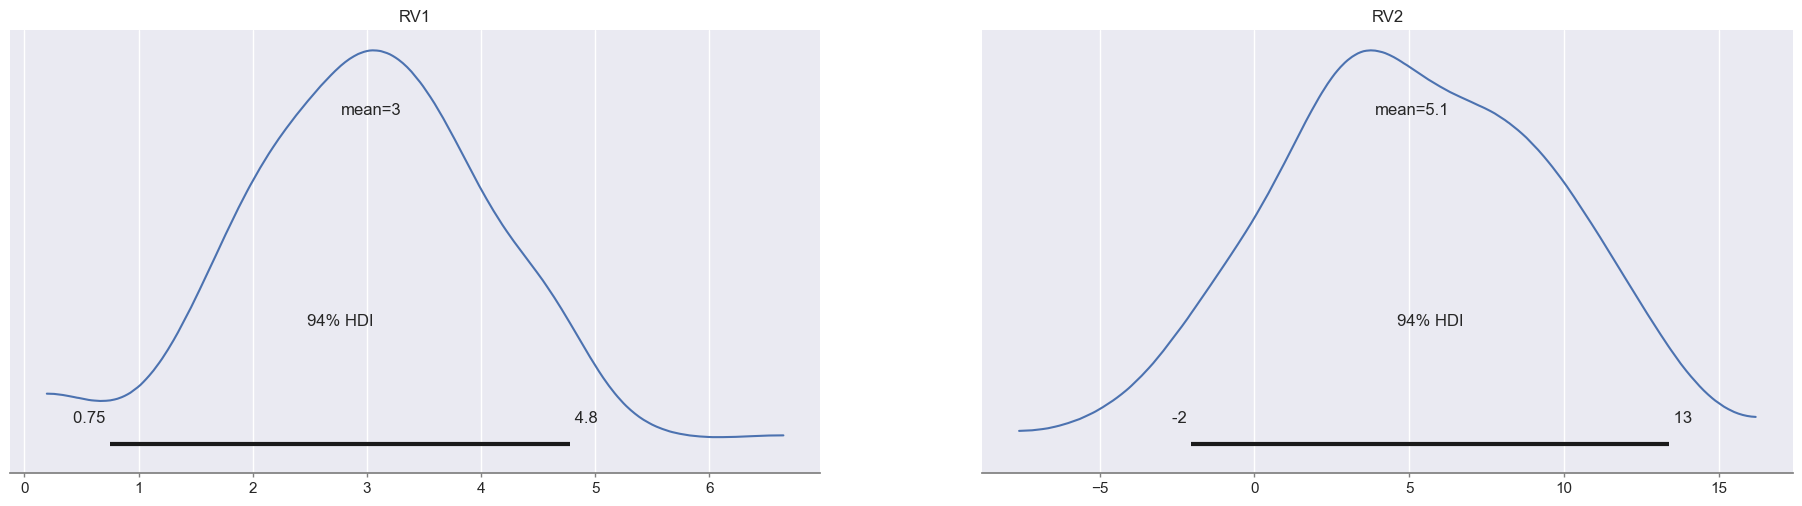

In [7]:
az.plot_posterior(trace)

**Conditional**
<br>
<br> $MU \sim N(mu_{MU}, sigma_{MU})$
<br> $RV \sim N(MU, sigma)$
<br> P(RV|MU)



Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [MU]
>BinaryGibbsMetropolis: [RV]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 28 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
MU,0.454,0.293,0.004,0.933,0.020,0.015,204.0,291.0,1.01
RV,0.456,0.498,0.000,1.000,0.022,0.016,509.0,509.0,1.00


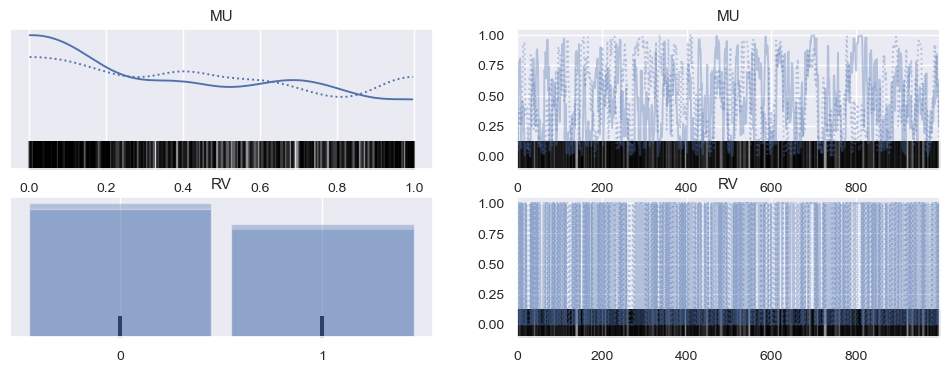

In [8]:
with pm.Model() as model: 
    mu = pm.Normal('MU', mu=1, sigma=4)  
    
    # note: comment out ONLY ONE of these for different distribution
    # rv = pm.Normal("RV", mu=5 * mu, sigma=2)
    rv = pm.Bernoulli("RV", p=mu)
    
    trace = pm.sample(1000, cores=2) 
    pm.plot_trace(trace) 

pm.summary(trace)

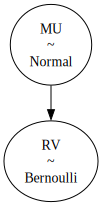

In [9]:
pm.model_to_graphviz(model)

array([<Axes: title={'center': 'MU'}>, <Axes: title={'center': 'RV'}>],
      dtype=object)

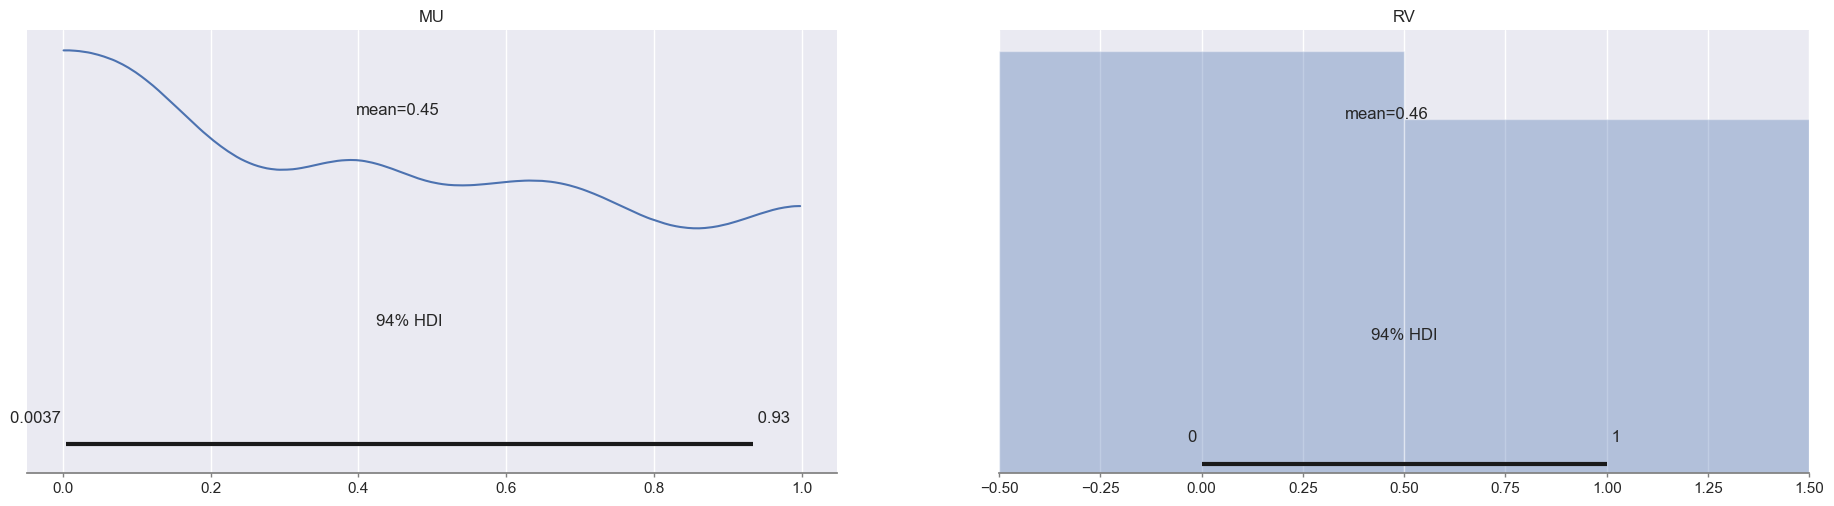

In [10]:
az.plot_posterior(trace)

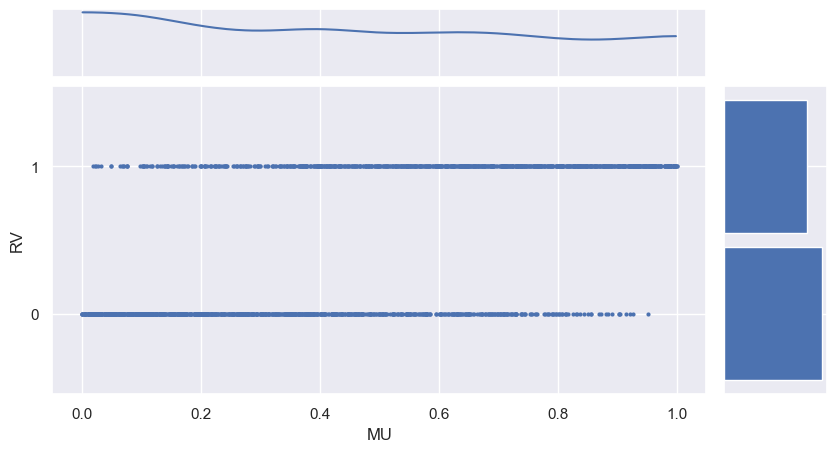

In [11]:
# displaying marginal
bins = np.linspace(0.2, 0.8, 7)
axes = az.plot_pair(trace, var_names=['MU', 'RV'], marginals=True)

**Pass on Array [multiple RV but the same]**
<br>
<br> $MU \sim N(mu_{MU}, sigma_{MU})$
<br> $RV \sim N(MU, sigma)$
<br> $P(RV_0|MU) or P(RV_1|MU) or P(RV_2|MU)  $

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [MU3, RV]


Sampling 2 chains for 1_000 tune and 100 draw iterations (2_000 + 200 draws total) took 27 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
MU3,0.566,3.668,-5.808,6.825,0.952,0.687,13.0,20.0,1.12
RV[0],0.081,3.994,-6.902,7.368,1.028,0.741,14.0,58.0,1.12
RV[1],1.456,7.693,-12.910,14.051,1.812,1.303,15.0,20.0,1.11
RV[2],1.624,11.076,-16.705,21.187,2.847,2.053,14.0,18.0,1.12
RV[3],2.113,14.721,-24.580,26.812,3.641,2.622,15.0,42.0,1.11


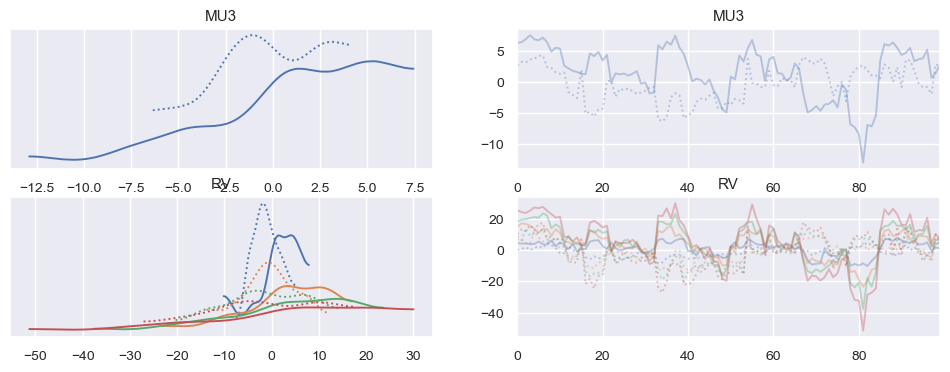

In [12]:
X = np.arange(1,5)

with pm.Model() as model: 
    mu = pm.Normal('MU3', mu=1, sigma=4)
    rv = pm.Normal("RV", mu=mu * X , sigma=2)

    
    trace = pm.sample(100, cores=2) 
    pm.plot_trace(trace) 

pm.summary(trace)

**Conditional Probability (Observed)**
<br>
<br> observations from D
<br>
<br> $D \sim N(MU, 1)$
<br>
<br> $MU \sim N(mu_{MU}, 2)$
<br>
<br> $P(MU | Observation) = P(Observations | MU) * P(MU)$
<br>



<Axes: ylabel='Frequency'>

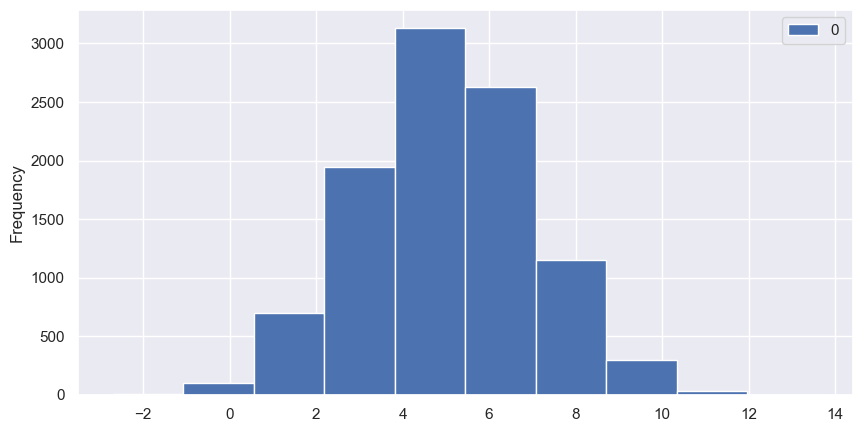

In [13]:
# create some normal values
D = np.random.normal(loc=5, scale=2, size=[1, 10000]).flatten()
pd.DataFrame(D).plot.hist()

In [14]:
indexes = np.random.choice(D.size, size=100)
observations = D[indexes]
observations[:5]

array([7.02123814, 5.87512639, 5.78343035, 6.16801727, 6.45330809])

In [15]:
X = np.arange(0, observations.size)

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [MU]


Sampling 4 chains for 1_000 tune and 100 draw iterations (4_000 + 400 draws total) took 61 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
MU,0.075,0.002,0.071,0.078,0.0,0.0,192.0,214.0,1.02


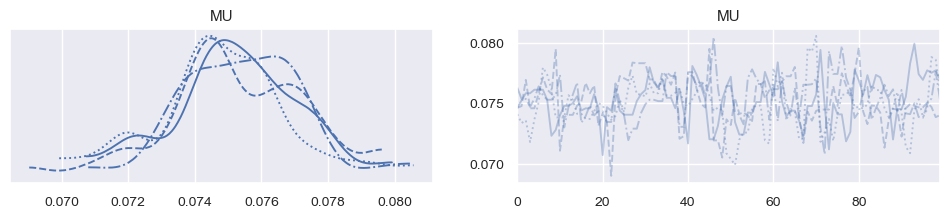

In [16]:
with pm.Model() as model: 
    # prior
    mu = pm.Normal('MU', mu=7, sigma=2) 

    #likelihood
    likelihood = pm.Normal('Likelihood', mu=mu * X, sigma=1, observed = observations) 
    
    trace = pm.sample(100) 
    pm.plot_trace(trace) 

pm.summary(trace)

<Axes: title={'center': 'MU'}>

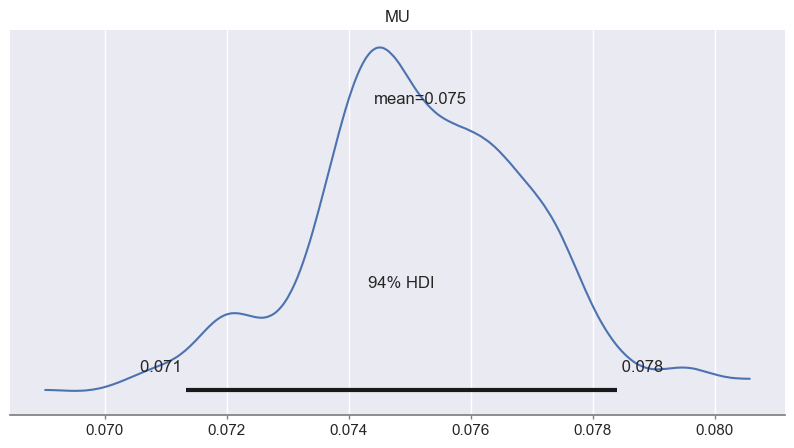

In [17]:
az.plot_posterior(trace)